### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент:  Пономарева Л. М.
##### Группа:   НПИбд-02-19

## Москва 2022
***

## Вариант №10
1. Набор данных: wine_quality 
2. Независимые признаки: features/density, features/chlorides 
3. Метка класса: quality 
4. Параметры глубокой нейронной сети: кол-во скрытых слоев – 3, кол-во нейронов в скрытом слое – 128. 

 

### Задание 1	
Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

Загрузим набор данных wine_quality:

In [2]:
ds = tfds.load("wine_quality", split='train')
df = tfds.as_dataframe(ds)
df.sample(10)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/wine_quality/white/1.0.0.incompleteQQO8T5/wine_quality-train.tfrecord


  0%|          | 0/4898 [00:00<?, ? examples/s]

Dataset wine_quality downloaded and prepared to /root/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.


,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
2630,11.2,0.030,0.27,0.99212,8.1,43.0,3.16,4.300000,0.33,123.0,0.260,6
1856,9.4,0.052,0.30,0.99825,6.6,18.0,3.37,13.000000,0.49,143.0,0.240,6
4116,9.4,0.070,0.28,0.99660,7.0,45.0,3.34,7.500000,0.55,185.0,0.210,5
178,11.5,0.043,0.38,0.99340,7.9,46.0,3.12,8.000000,0.32,152.0,0.220,7
3404,10.7,0.049,0.32,0.99332,6.8,37.0,3.12,7.600000,0.44,107.0,0.190,7
610,10.2,0.042,0.06,0.99432,5.7,9.0,3.44,6.800000,0.44,84.0,0.695,5
2748,9.5,0.032,0.14,0.99542,5.9,30.0,3.28,8.600000,0.44,142.0,0.280,6
2717,10.0,0.052,0.46,0.99800,7.8,38.0,3.15,13.600000,0.50,118.0,0.180,6
3984,8.8,0.048,0.48,1.00100,7.5,55.0,2.95,19.450001,0.40,243.0,0.330,5
1898,12.3,0.033,0.39,0.99080,7.2,29.0,3.26,2.300000,0.54,102.0,0.230,7


Создадим набор , в котором оставим только два независимых признака `features/density` и `features/chlorides` и метку класса `quality`,  убрав из названий признаков строку `features/`:

In [3]:
df1 = df[['features/density','features/chlorides','quality']]
df1.columns = ['density','chlorides','quality']
df1.sample(5)

,density,chlorides,quality
1888,0.99670,0.059,6
885,0.99990,0.038,6
394,0.99220,0.038,4
64,0.99888,0.052,6
2157,0.99226,0.049,5


### Задание 2	
Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

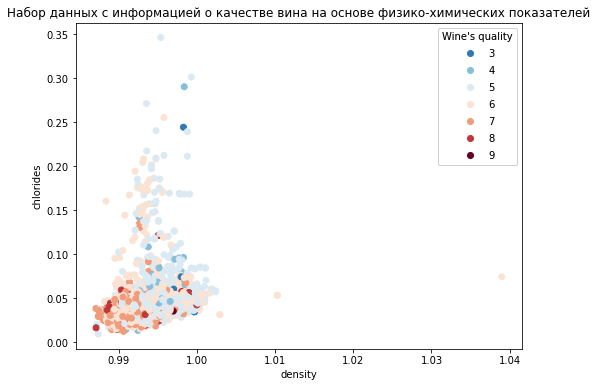

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title(r"Набор данных с информацией о качестве вина на основе физико-химических показателей", fontsize=12)
ax.set_xlabel(r"density")        
ax.set_ylabel(r"chlorides")

scatter = ax.scatter(df1['density'], df1['chlorides'], c=df1['quality'],
                     vmin=2, vmax=9, cmap='RdBu_r')

legend = ax.legend(*scatter.legend_elements(num=6),
                    loc="upper right", title="Wine's quality")
ax.add_artist(legend);

### Задание 3
Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек. 

Объявим винами высшего качества вина с индексом качества более или равным 6:

In [5]:
df1['class'] = [1 if q >= 6 else 0 for q in df1['quality']]
df1.drop('quality', axis=1, inplace=True)

df1['class'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


1    3258
0    1640
Name: class, dtype: int64

### Задание 4
Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.

Для начала представим данные в виде массивов:

In [6]:
X = np.array(df1[['density','chlorides']])
y = np.array(df1[['class']]).reshape(-1)
X.shape, y.shape

((4898, 2), (4898,))

Теперь можем разделить набор данных на обучающую и тестовую выборки:

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 2), (980, 2), (3918,), (980,))

Создадим нормализующий слой:

In [9]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X_train)

Создадим нейронную сеть со слоем нормализации, тремя скрытыми слоями с 128  нейронами, функцией активации ReLu и выходным слоем из одного нейрона с функцией активации сигмоида:


In [10]:
model_1 = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(128, activation = 'relu'), 
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

Используем в качестве функции потерь при работе с задачами бинарной классификации `binary_crossentropy`. В ходе обучения будем отслеживать показатель аккуратности (accuracy):

In [11]:
model_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),
                metrics = ['accuracy'])

Обучим ее на обучающей выборке:

In [12]:
model_1.fit(X_train, y_train, epochs = 15, verbose = 1);

Epoch 1/15
123/123 [==============================] - 1s 2ms/step - loss: 0.6398 - accuracy: 0.6646
Epoch 2/15
123/123 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.6672
Epoch 3/15
123/123 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6672
Epoch 4/15
123/123 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6672
Epoch 5/15
123/123 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.6685
Epoch 6/15
123/123 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6679
Epoch 7/15
123/123 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.6682
Epoch 8/15
123/123 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.6674
Epoch 9/15
123/123 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.6682
Epoch 10/15
123/123 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6710

**Показатели качества бинарной классификации.**  
Когда имеется всего два класса, то будем называть класс $c_{1}$ положительным классом, а класс $c_{2}$ отрицательным классом. Тогда матрица ошибок (confusion matrix) принимает вид:

$$\left(\begin{array}{cc}
TP & FN\\
FP & TN
\end{array}\right),$$

где 
* $TP$ – (True Positives) – число корректно спрогнозированных точек в классе $c_{1}$ 


In [13]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

* $TN$ – (True Negatives) – число корректно спрогнозированных точек в классе $c_{2}$ 

In [14]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

* $FP$ – (False Positives) – число точек в классе $c_{2}$, ошибочно спрогнозированных в класс $c_{1}$

In [15]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

* $FN$ – (False Negatives) – число точек в классе $c_{1}$, ошибочно спрогнозированных в класс $c_{2}$

In [16]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

Функция расчета матрицы ошибок для бинарной классификации:

In [17]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

In [18]:
prediction = model_1.predict(X_test)
y_pred = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction)])

In [19]:
tp = TP(y_test, y_pred)
tn = TN(y_test, y_pred)
fp = FP(y_test, y_pred)
fn = FN(y_test, y_pred)

Оценим качество бинарной классификации при помощи матрицы ошибок:

In [20]:
confusion_matrix(y_test, y_pred)

array([[ 31, 305],
       [ 23, 621]])

По ней мы можем рассчитать:
1. Точность (precision) для положительного класса

In [21]:
tp / (tp + fp)

0.6706263498920086

2. Долю ошибок (error rate)

In [22]:
P = tp + fn
N = tn + fp
(fp+fn)/(P+N)

0.3346938775510204

3. Вероятность обнаружения (TPR)

In [23]:
tp/P

0.9642857142857143

### Задание 5
Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.

In [24]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()] 
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация 
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

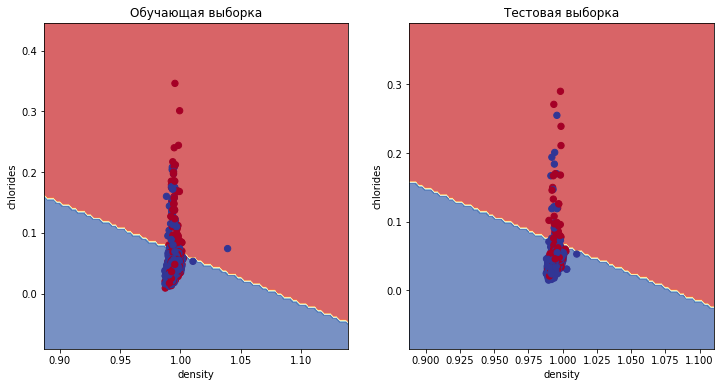

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model_1, X=X_train, y=y_train)
plt.xlabel('density')
plt.ylabel('chlorides')
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model_1, X=X_test, y=y_test)
plt.xlabel('density')
plt.ylabel('chlorides');

### Задание 6
Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.

In [26]:
prediction_ = model_1.predict(X)
prediction_.shape

(4898, 1)

In [27]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [28]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

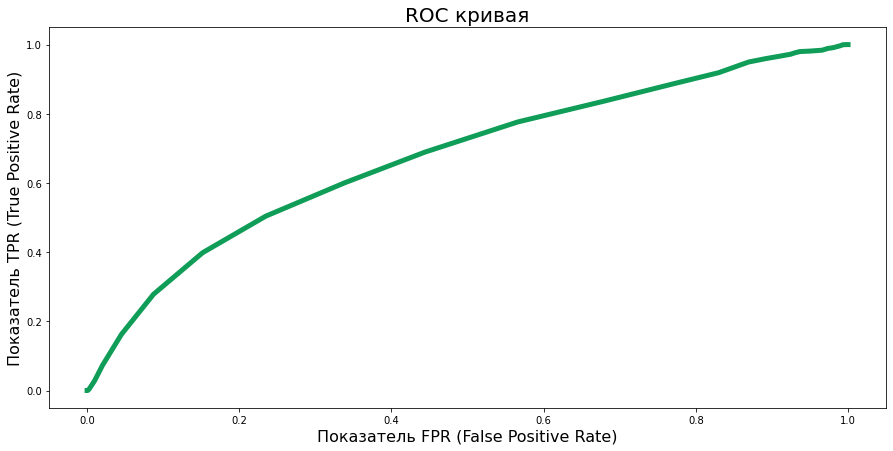

In [29]:
plt.figure(figsize=(15,7))

ROC = roc_from_scratch(prediction_.reshape(-1),y,partitions=50)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58',lw=5)
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);

Составная формула метода трапеций:  
 $\int _{a}^{b}f(x)\,dx\approx \sum _{{i=0}}^{{n-1}}{\frac  {f(x_{i})+f(x_{{i+1}})}{2}}(x_{{i+1}}-x_{{i}})$

Создадим функцию для подсчета площади одной трапеции (одного шага):

In [30]:
def node(fx1, fx2, x1, x2):
  return np.abs((fx1+fx2)*(x2-x1)/2)

Получим значение площади под ROC-кривой:

In [31]:
S = 0
for i in range(ROC.shape[0]-1):
  S += node(ROC[i][1], ROC[i+1][1], ROC[i][0], ROC[i+1][0])
print("AUC = ", S)

AUC =  0.674665083322104


### Задание 7
Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети. 

Сформируем массивы из признаков (X2) и меток класса (y2):

In [122]:
X2 = np.array(df.drop('quality', axis=1))
y2 = np.array(df['quality'])
X2.shape, y2.shape

((4898, 11), (4898,))

Создадим нормализующий слой и адаптируем для всех признаков:

In [123]:
features_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X2.shape[1],)) 
features_normalizer.adapt(X2)

Создадим нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида:

In [124]:
model_2 = tf.keras.Sequential([
    features_normalizer,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 11)               3         
 ion)                                                            
                                                                 
 dense_42 (Dense)            (None, 1)                 12        
                                                                 
Total params: 15
Trainable params: 12
Non-trainable params: 3
_________________________________________________________________


Скомпилируем и обучим модель:

In [125]:
model_2.compile(loss=tf.keras.losses.binary_crossentropy)
model_2.fit(X2, y2, epochs=100, verbose=0);

Посмотрим на значения весов в выходном слое:

In [126]:
mean = np.abs(model_2.layers[1].kernel)
mean

array([[14.9794035],
       [15.018522 ],
       [15.936247 ],
       [15.197053 ],
       [15.204806 ],
       [15.823586 ],
       [14.990222 ],
       [14.923561 ],
       [15.948238 ],
       [15.238623 ],
       [15.730975 ]], dtype=float32)

Попробовала найти некие средние значения:

In [127]:
for i in range(9):
  X2 = np.array(df.drop('quality', axis=1))
  y2 = np.array(df['quality'])
  model_2 = tf.keras.Sequential([
      features_normalizer,
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model_2.compile(loss=tf.keras.losses.binary_crossentropy)
  model_2.fit(X2, y2, epochs=100, verbose=0)
  mean+=np.abs(model_2.layers[1].kernel)
mean/10

array([[15.168088 ],
       [15.351463 ],
       [15.413597 ],
       [15.408157 ],
       [15.467511 ],
       [15.099386 ],
       [15.225761 ],
       [15.3685665],
       [15.450398 ],
       [15.266645 ],
       [15.4457655]], dtype=float32)

Более высокие значения весов (по абсолютному значению) и, соответственно, более высокую важность имеет 4 признак, который мы и так используем. Поэтому возьмем следующий по важности признак - 9 (features/sulphates)

### Задание 8
Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

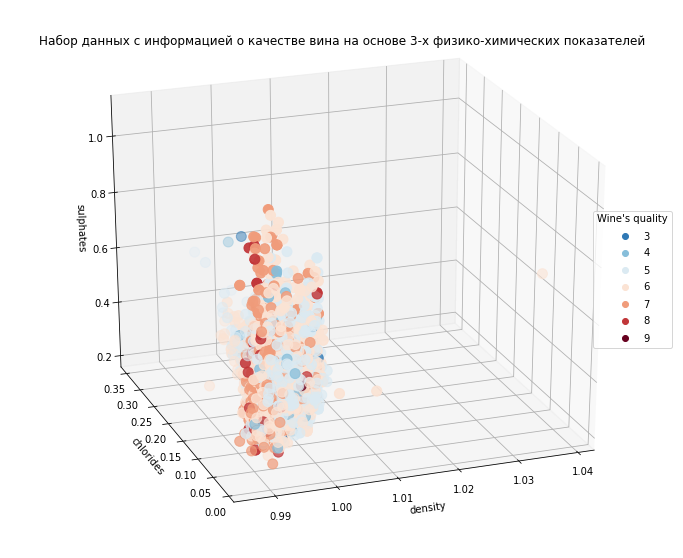

In [38]:
fig = plt.figure(figsize=(12,10)) 
ax = plt.axes(projection='3d') 
ax.set_title(r"Набор данных с информацией о качестве вина на основе 3-x физико-химических показателей", fontsize=12)

xs = df['features/density']
ys = df['features/chlorides']
zs = df['features/sulphates']

ax.scatter( xs, ys, zs, c=df['quality'],
                     vmin=2, vmax=9, cmap='RdBu_r', s=100) 
ax.set_xlabel('density')        
ax.set_ylabel('chlorides')
ax.set_zlabel('sulphates') 
legend = ax.legend(*scatter.legend_elements(num=6), 
                    loc="center right", title="Wine's quality")
ax.view_init( azim=-110, elev=25 );

### Задание 9 
Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.

Разделим набор данных на массив признаков и массив меток классов.

In [112]:
X3 = np.array(df.drop('quality', axis=1))
y3 = np.array(df['quality'])
X3.shape, y3.shape

((4898, 11), (4898,))

Разобъем набор данных на обучающую и тестовую выборки:

In [113]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
y3_train.shape, y3_test.shape

((3918,), (980,))

Преобразуем одномерный массив со зачениями от 3 до 9 (категория вина) в многомерный массив с 7 колонками, в котором каждая колонка отвечает за свою категорию и принимает значение 0 или 1 (в одной строке одна 1).

In [114]:
def to_one_hot(labels, dimension=7):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i-3, label-3] = 1.
    return results

In [115]:
y3_train = to_one_hot(y3_train)
y3_test = to_one_hot(y3_test)
y3_train.shape, y3_test.shape

((3918, 7), (980, 7))

Построим нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучим ее на обучающей выборке:

Нормализующий слой:

In [116]:
features_normalizer2 = tf.keras.layers.Normalization(axis=None,input_shape=(X3.shape[1],)) 
features_normalizer2.adapt(X3_train)

Нейронная сеть: кол-во скрытых слоев – 3, кол-во нейронов в скрытом слое – 128.

In [117]:
model = tf.keras.Sequential([
    features_normalizer2,
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax") # по количеству классов
])

In [118]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              #optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Обучим нашу модель:

In [119]:
history = model.fit(X3_train,
                    y3_train,
                    epochs=30,
                    # уровень выводимой информации
                    verbose=1,
                    # проверка (валидация) на 20% обучающих данных
                    validation_split = 0.2)

Epoch 1/30
98/98 [==============================] - 1s 4ms/step - loss: 1.6366 - accuracy: 0.4375 - val_loss: 1.3994 - val_accuracy: 0.4541
Epoch 2/30
98/98 [==============================] - 0s 3ms/step - loss: 1.3607 - accuracy: 0.4560 - val_loss: 1.2828 - val_accuracy: 0.4541
Epoch 3/30
98/98 [==============================] - 0s 2ms/step - loss: 1.3150 - accuracy: 0.4560 - val_loss: 1.2655 - val_accuracy: 0.4541
Epoch 4/30
98/98 [==============================] - 0s 2ms/step - loss: 1.3045 - accuracy: 0.4560 - val_loss: 1.2584 - val_accuracy: 0.4541
Epoch 5/30
98/98 [==============================] - 0s 2ms/step - loss: 1.3008 - accuracy: 0.4560 - val_loss: 1.2528 - val_accuracy: 0.4541
Epoch 6/30
98/98 [==============================] - 0s 2ms/step - loss: 1.2976 - accuracy: 0.4560 - val_loss: 1.2497 - val_accuracy: 0.4541
Epoch 7/30
98/98 [==============================] - 0s 3ms/step - loss: 1.2961 - accuracy: 0.4560 - val_loss: 1.2518 - val_accuracy: 0.4541
Epoch 8/30
98/98 [==

### Задание 10
Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

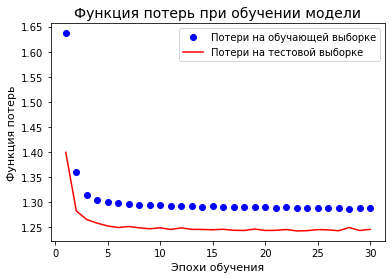

In [120]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, "r", label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели", size = 14)
plt.xlabel("Эпохи обучения", size = 11)
plt.ylabel("Функция потерь", size = 11)
plt.legend();

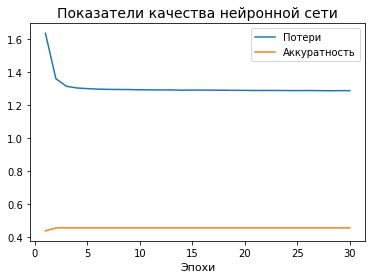

In [121]:
plt.plot(np.arange(1, 31), history.history['loss'], label='Потери')
plt.plot(np.arange(1, 31), history.history['accuracy'], label='Аккуратность')
plt.title('Показатели качества нейронной сети', size=14)
plt.xlabel('Эпохи', size=11)
plt.legend();